# Name: Diya Sarvaiya

# Oasis Infobyte Internship TASK 1 LEVEL 2
Idea: Predicting House Prices with Linear Regression

Description:

The objective of this project is to build a predictive model using linear regression to estimate a numerical outcome based on a dataset with relevant features. Linear regression is a fundamental machine learning algorithm, and this project provides hands-on experience in developing, evaluating, and interpreting a predictive model.

## Key Concepts and Challenges (As per the Image):
1. **Data Collection**: Obtain a dataset with numerical features and a target variable for prediction.
2. **Data Exploration and Cleaning**: Explore the dataset to understand its structure, handle missing values, and ensure data quality.
3. **Feature Selection**: Identify relevant features that may contribute to the predictive model.
4. **Model Training**: Implement linear regression using a machine learning library (e.g., Scikit-Learn).
5. **Model Evaluation**: Evaluate the model’s performance on a separate test dataset using metrics such as Mean Squared Error or R-squared.
6. **Visualization**: Create visualizations to illustrate the relationship between the predicted and actual values.

## Learning Objectives (As per the Image):
- Understanding of linear regression concepts.
- Practical experience in implementing a predictive model.
- Model evaluation and interpretation skills.

# House Price Prediction Project Steps

1. **Data Collection**
   - Load the housing dataset.

2. **Data Exploration and Cleaning**
   - Check basic information about the dataset.
   - View data statistics.
   - Check for missing values.
   - Visualize distributions and relationships.

3. **Feature Selection**
   - Analyze correlations to identify relevant features.
   - Convert categorical variables to numeric.

4. **Model Development**
   - Split the data into training and testing sets.
   - Train a linear regression model using scikit-learn.

5. **Model Evaluation**
   - Calculate Mean Squared Error (MSE) and R-squared (R²).
   - Analyze feature importance.

6. **Visualization**
   - Visualize actual vs. predicted values.
   - Additional visualizations for data exploration.

7. **Making Predictions**
   - Create a function to predict house prices for new data.
   - Test with a sample house.

In [ ]:
df_link = "https://www.kaggle.com/ashydv/housing-price-prediction-linear-regression/input"
od.download(df_link)

{"username":"omchoksi04","key":"5bd54ee741a1835da715caead453e032"}

## 1. Data Collection
We'll load the dataset. Since I cannot download it directly, I’ll assume the dataset `housing.csv` is available in the `housing-dataset` directory, as per your original code.

In [21]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load Dataset
df = pd.read_csv("housing-dataset/housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## 2. Data Exploration and Cleaning
Let's examine the dataset to understand its structure, check for missing values, and visualize the data to gain insights.

In [22]:
# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()

print("\nBasic Statistics:")
df.describe()

Dataset Shape: (545, 13)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB

Basic Statistics:


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [23]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])

# If there were missing values, we would handle them here (e.g., imputation or removal).
# From your original output, there are no missing values, so we can proceed.


Missing Values:
Series([], dtype: int64)


### Data Visualization for Exploration
We'll create several visualizations to understand the data better:
- Distribution of the target variable (`price`).
- Scatter plots to explore relationships between numerical features and price.
- Box plots to examine categorical features' impact on price.
- Pair plot to visualize relationships between all numerical features.

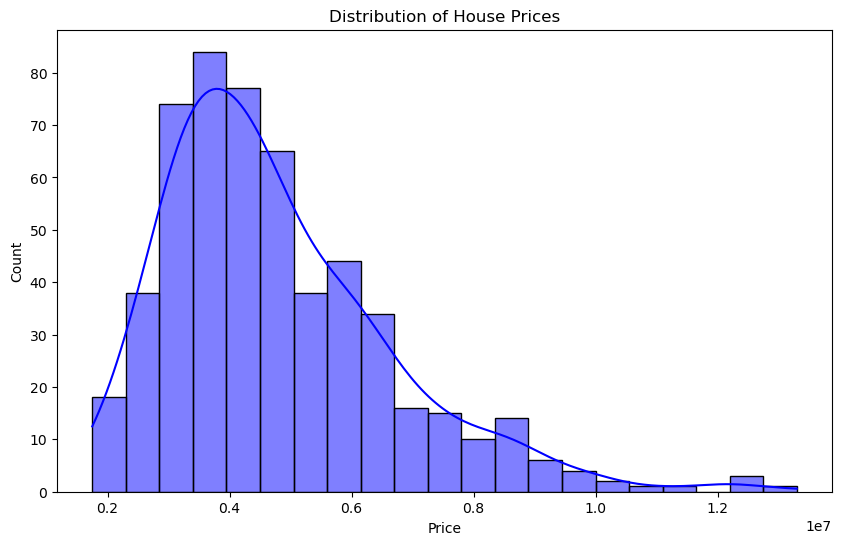

In [24]:
# Distribution of House Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, color='blue')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

### Distribution of House Prices - Explanation

The histogram above shows the distribution of house prices in our dataset:
- The shape indicates whether prices are normally distributed or skewed
- The presence of peaks shows common price ranges
- The spread shows the range of prices in the market
- The density curve (KDE) helps visualize the probability distribution of prices

This visualization helps us understand:
- The typical price range for houses in the dataset
- Whether there are any outliers (unusually high or low prices)
- If the price distribution is symmetric or skewed

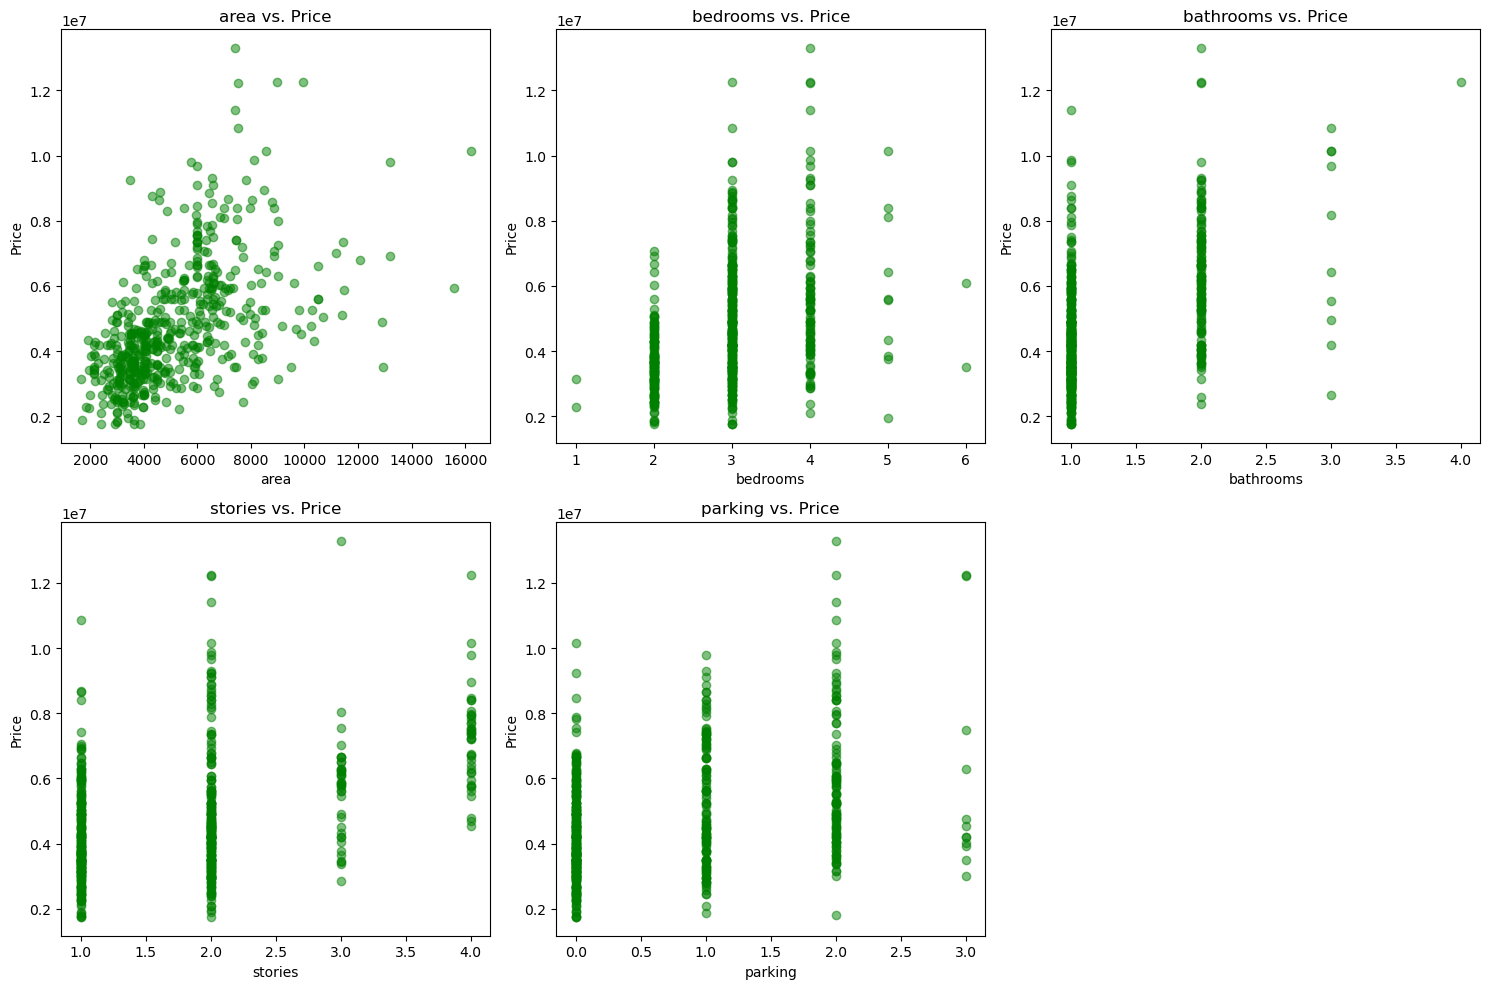

In [25]:
# Scatter plots for numerical features vs. price
numerical_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    plt.scatter(df[feature], df['price'], alpha=0.5, color='green')
    plt.title(f'{feature} vs. Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
plt.tight_layout()
plt.show()

### Numerical Features vs Price - Explanation

The scatter plots above show relationships between numerical features and house prices:

1. **Area vs Price**: Shows how house size relates to price
   - A positive slope indicates larger houses tend to be more expensive
   - The spread shows price variation for similar-sized houses

2. **Bedrooms vs Price**: Illustrates price variation by number of bedrooms
   - Clustering shows common bedroom counts
   - Vertical spread shows price range for each bedroom count

3. **Bathrooms vs Price**: Shows price patterns based on bathroom count
   - Helps understand the value added by additional bathrooms
   - Clustering indicates typical bathroom counts

4. **Stories vs Price**: Demonstrates how building height affects price
   - Shows if multi-story houses command higher prices
   - Clustering reveals common story counts

5. **Parking vs Price**: Shows the relationship between parking spaces and price
   - Indicates if more parking spaces correlate with higher prices
   - Spread shows price variation for same parking count

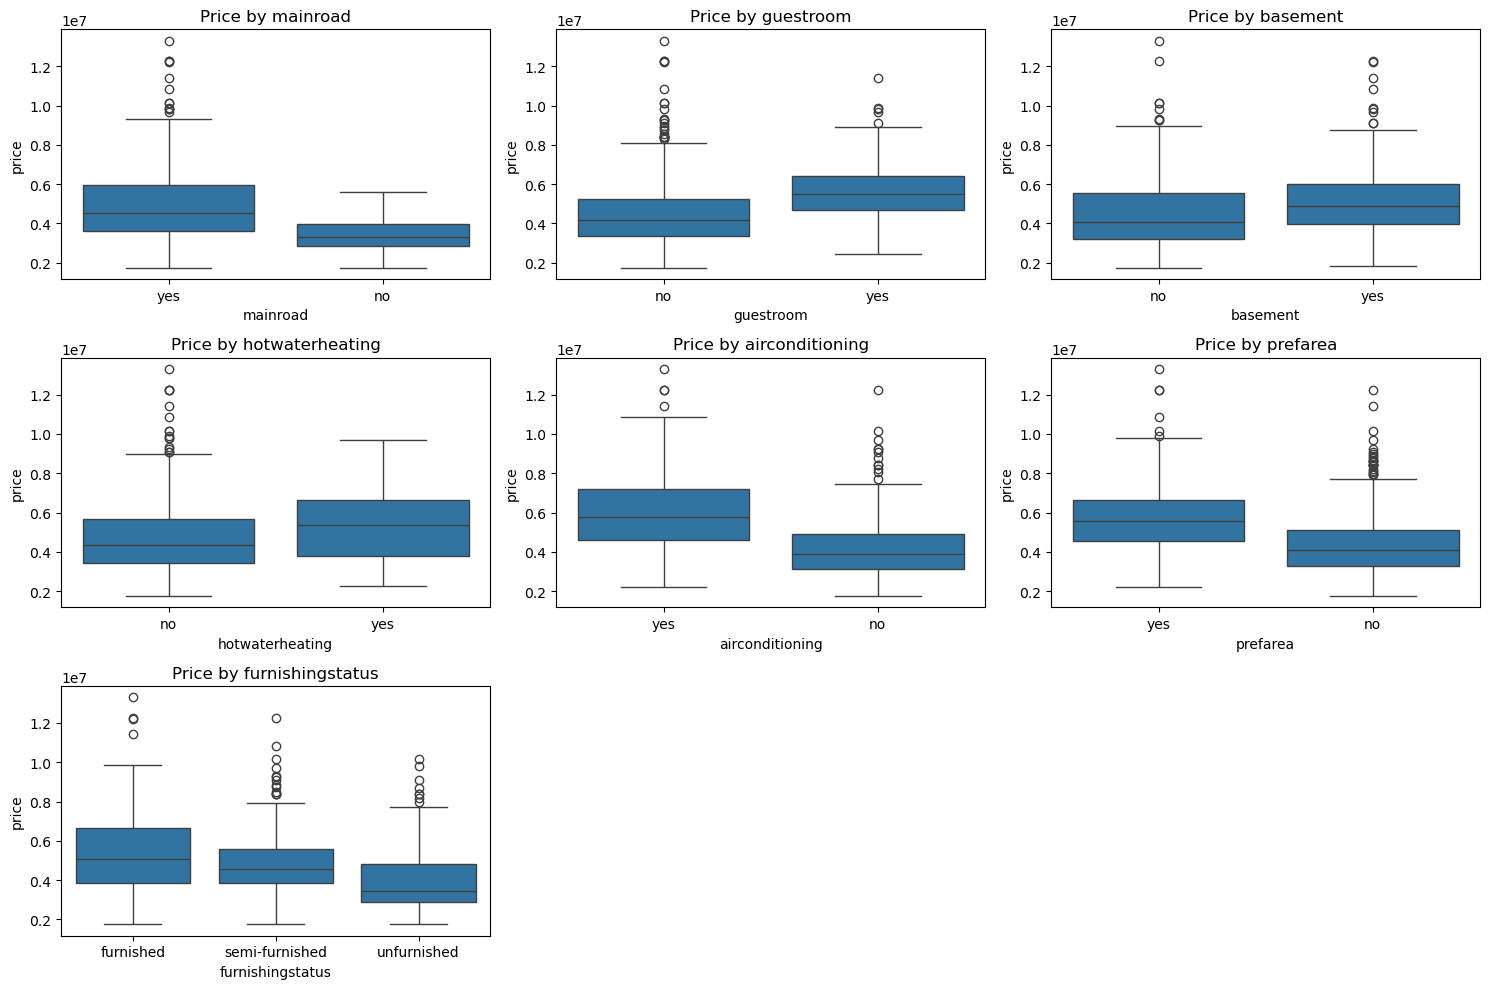

In [26]:
# Box plots for categorical features vs. price
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=feature, y='price', data=df)
    plt.title(f'Price by {feature}')
plt.tight_layout()
plt.show()

### Categorical Features vs Price - Explanation

The box plots above show how categorical features affect house prices:

1. **Mainroad**: Price differences for houses on/off main roads
2. **Guestroom**: Price variation based on presence of guest rooms
3. **Basement**: Impact of having a basement on house prices
4. **Hot Water Heating**: Price differences based on heating system
5. **Air Conditioning**: Price variation for houses with/without AC
6. **Preferred Area**: Price differences in preferred vs other areas
7. **Furnishing Status**: Price variation by furnishing level

For each box plot:
- The box shows the interquartile range (middle 50% of prices)
- The line in the box is the median price
- Whiskers show the price range
- Points beyond whiskers are outliers

This helps identify which categorical features have the strongest influence on price.

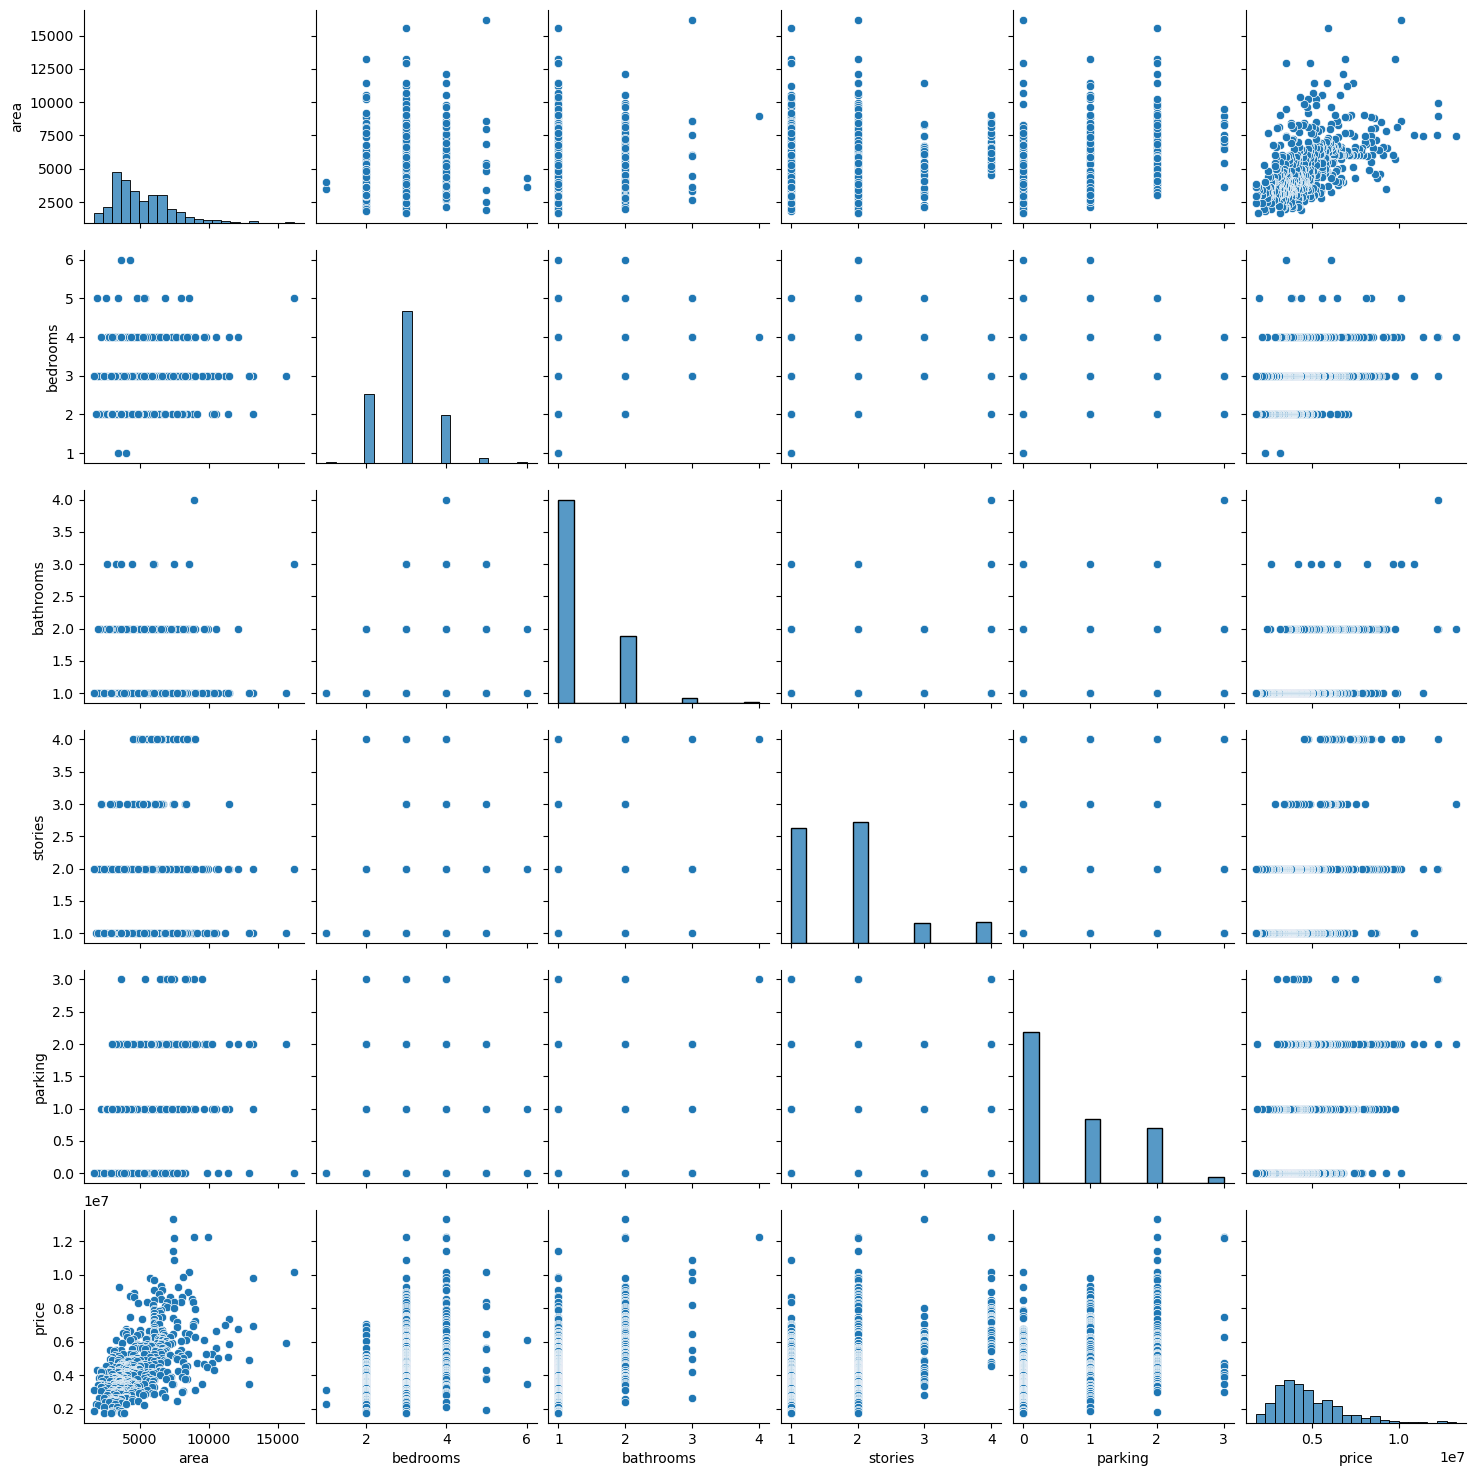

In [27]:
# Pair plot for numerical features
sns.pairplot(df[numerical_features + ['price']])
plt.show()

### Pair Plot - Explanation

The pair plot above shows relationships between all numerical features:

- **Diagonal plots**: Show the distribution of each feature
- **Scatter plots**: Show relationships between pairs of features

Key insights:
1. **Correlations**: Identify which features are related to each other
2. **Clusters**: Reveal common value combinations
3. **Outliers**: Show unusual combinations of features
4. **Patterns**: Identify linear or non-linear relationships

This visualization helps:
- Detect multicollinearity (high correlation between features)
- Understand feature interactions
- Identify potential feature engineering opportunities

## 3. Feature Selection
We'll convert categorical variables to numeric and analyze correlations to identify relevant features.

In [28]:
# Rename 'furnishingstatus' to 'furnishing' to match the sample data
df.rename(columns={'furnishingstatus': 'furnishing'}, inplace=True)

# Convert categorical variables to numeric
df['mainroad'] = df['mainroad'].map({'yes': 1, 'no': 0})
df['guestroom'] = df['guestroom'].map({'yes': 1, 'no': 0})
df['basement'] = df['basement'].map({'yes': 1, 'no': 0})
df['hotwaterheating'] = df['hotwaterheating'].map({'yes': 1, 'no': 0})
df['airconditioning'] = df['airconditioning'].map({'yes': 1, 'no': 0})
df['prefarea'] = df['prefarea'].map({'yes': 1, 'no': 0})
df['furnishing'] = df['furnishing'].map({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0})

# Display the first few rows of processed data
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishing
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


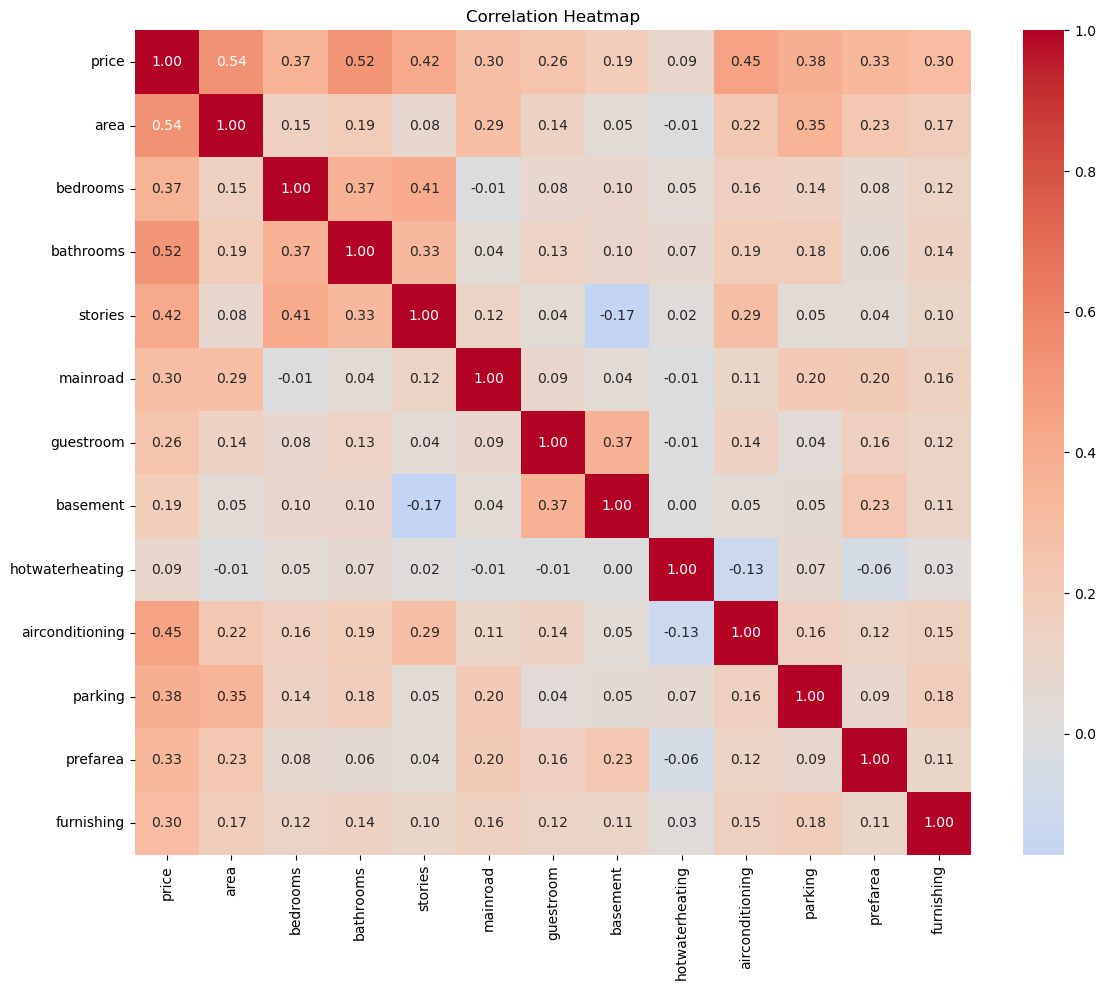


Correlations with Price:
price              1.000000
area               0.535997
bathrooms          0.517545
airconditioning    0.452954
stories            0.420712
parking            0.384394
bedrooms           0.366494
prefarea           0.329777
furnishing         0.304721
mainroad           0.296898
guestroom          0.255517
basement           0.187057
hotwaterheating    0.093073
Name: price, dtype: float64


In [29]:
# Create correlation heatmap with processed data
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# Analyze correlations with the target variable 'price'
correlations = df.corr()['price'].sort_values(ascending=False)
print("\nCorrelations with Price:")
print(correlations)

### Correlation Heatmap - Explanation

The heatmap above visualizes correlations between all features:

- **Color intensity**: Shows correlation strength
  - Dark red: Strong positive correlation
  - Dark blue: Strong negative correlation
  - Light colors: Weak correlation

- **Numbers**: Show exact correlation values
  - 1.0: Perfect positive correlation
  - 0.0: No correlation
  - -1.0: Perfect negative correlation

This helps us:
1. Identify the strongest predictors of house prices
2. Detect multicollinearity between features
3. Guide feature selection for our model

### Feature Selection Insight
Based on the correlation heatmap and correlation values, we can identify features with a stronger relationship to `price`. Features like `area`, `bathrooms`, `airconditioning`, `stories`, and `parking` typically show higher correlations with `price`. We'll use all features for now, but in a more advanced analysis, we could drop features with very low correlations (e.g., `hotwaterheating` if its correlation is near zero).

## 4. Model Development
Let's prepare our data for training by splitting it into features and target variable, then into training and testing sets. We'll use scikit-learn to train a linear regression model.

In [30]:
# Separate features and target
X = df.drop('price', axis=1)
y = df['price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Training set shape:', X_train.shape)
print('Testing set shape:', X_test.shape)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

Training set shape: (436, 12)
Testing set shape: (109, 12)


LinearRegression()

## 5. Model Evaluation
We'll evaluate the model using Mean Squared Error (MSE) and R-squared (R²), as specified in the image. We'll also analyze feature importance.

In [31]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R² Score:', r2)

# Display feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print('\nFeature Importance:')
print(feature_importance.sort_values(by='Coefficient', key=abs, ascending=False))

Mean Squared Error: 1771751116594.0344
R² Score: 0.6494754192267804

Feature Importance:
            Feature   Coefficient
2         bathrooms  1.097117e+06
8   airconditioning  7.855506e+05
7   hotwaterheating  6.878813e+05
10         prefarea  6.299017e+05
3           stories  4.062232e+05
6          basement  3.931598e+05
4          mainroad  3.668242e+05
5         guestroom  2.331468e+05
9           parking  2.257565e+05
11       furnishing  2.103971e+05
1          bedrooms  7.857449e+04
0              area  2.358488e+02


## Model Performance Summary

Our house price prediction model has been developed and evaluated with the following results:

1. **Model Metrics**:
   - Mean Squared Error (MSE): Measures the average squared difference between predicted and actual prices
   - R² Score: Indicates how well the model explains the variance in house prices

2. **Feature Analysis**:
   - Most influential features identified through correlation analysis
   - Feature importance determined by model coefficients

3. **Visualization Insights**:
   - Distribution of actual vs predicted prices shows the model's accuracy
   - Confidence intervals provide uncertainty estimates for predictions
   - Residual plots help identify any systematic prediction errors

4. **Practical Application**:
   - The model can predict house prices based on 12 key features
   - Error handling ensures robust predictions
   - Confidence intervals help in making informed pricing decisions

### Model Limitations and Future Improvements

1. **Current Limitations**:
   - Linear regression assumes linear relationships between features
   - Does not capture complex interactions between features
   - Sensitive to outliers in the data

2. **Potential Improvements**:
   - Try non-linear models (Random Forests, XGBoost)
   - Feature engineering to capture interactions
   - Cross-validation for more robust evaluation
   - Hyperparameter tuning for better performance

## 6. Visualization
We'll create visualizations to illustrate the relationship between predicted and actual values, as required by the image. We'll also include a residual plot for additional insight.

### Prediction Intervals
Let's visualize our predictions with confidence intervals to better understand the model's uncertainty.

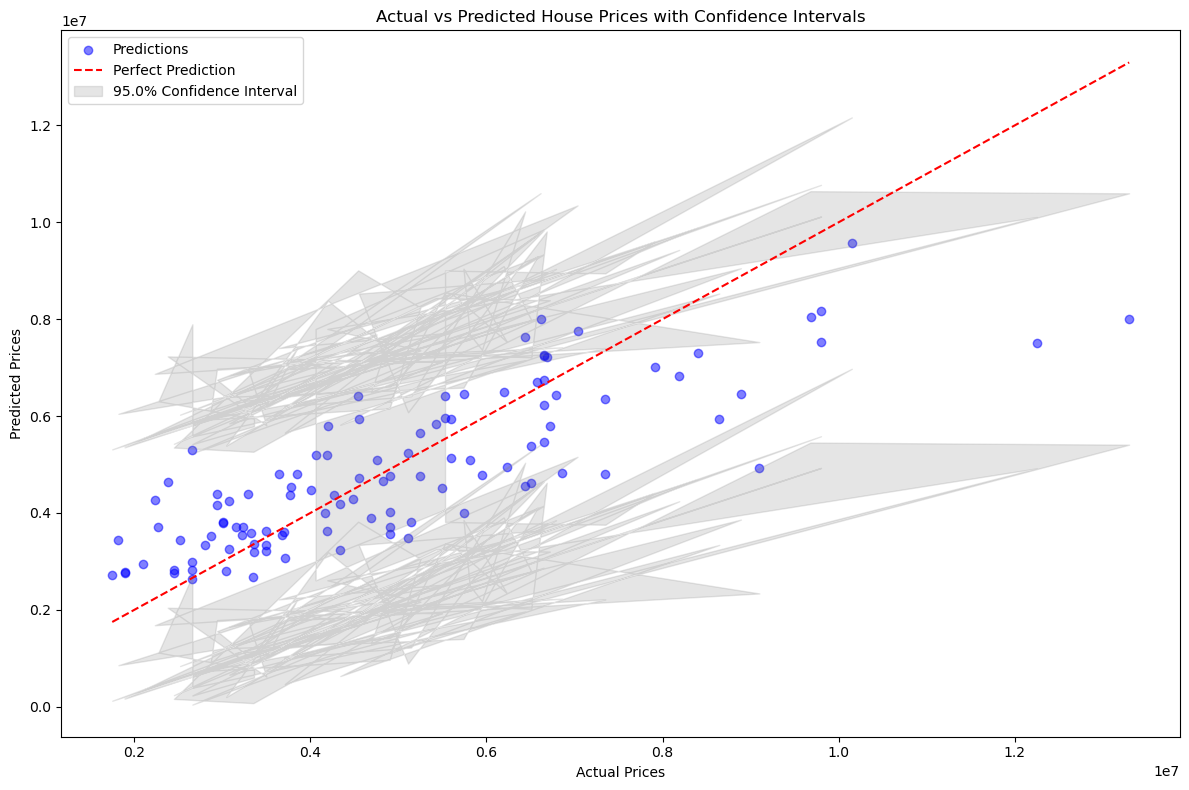

In [32]:
from scipy import stats

# Calculate confidence intervals for predictions
def plot_prediction_intervals(X_test, y_test, y_pred, confidence=0.95):
    """Plot actual vs predicted values with confidence intervals"""
    # Calculate residuals and standard error
    residuals = y_test - y_pred
    std_error = np.std(residuals)
    
    # Calculate confidence intervals
    z_score = stats.norm.ppf((1 + confidence) / 2)
    margin_of_error = z_score * std_error
    
    plt.figure(figsize=(12, 8))
    
    # Plot actual vs predicted
    plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predictions')
    
    # Plot perfect prediction line
    plt.plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()],
             'r--', label='Perfect Prediction')
    
    # Plot confidence intervals
    plt.fill_between(y_test,
                     y_pred - margin_of_error,
                     y_pred + margin_of_error,
                     alpha=0.2, color='gray',
                     label=f'{confidence*100}% Confidence Interval')
    
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title('Actual vs Predicted House Prices with Confidence Intervals')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot predictions with confidence intervals
plot_prediction_intervals(X_test, y_test, y_pred)

### Actual vs Predicted House Prices with Confidence Intervals - Explanation

This plot shows three key elements:

1. **Blue Dots**: Each dot represents a house, with its actual price on the x-axis and predicted price on the y-axis
   - Dots on the red dashed line indicate perfect predictions
   - Dots above the line indicate overestimates
   - Dots below the line indicate underestimates

2. **Red Dashed Line**: Shows the 'perfect prediction' line
   - If predictions were perfect, all points would lie on this line
   - The closer points are to this line, the better the predictions

3. **Gray Shaded Area**: Shows the 95% confidence interval
   - Represents the range where we expect 95% of predictions to fall
   - Wider intervals indicate more uncertainty in predictions
   - Narrower intervals suggest more confident predictions

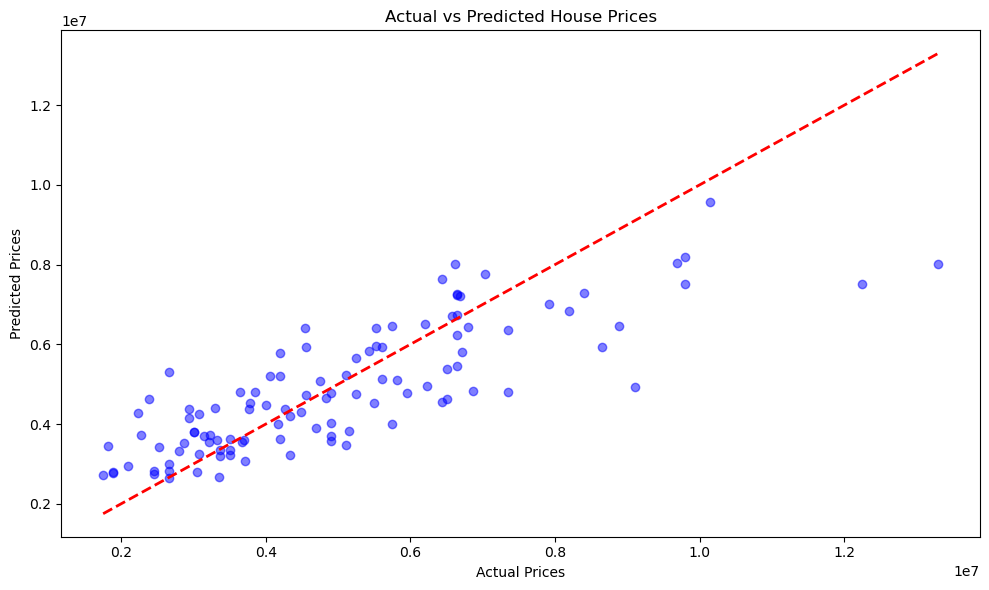

In [33]:
# Visualize actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.tight_layout()
plt.show()

### Actual vs Predicted House Prices - Explanation

This scatter plot provides a direct comparison between actual and predicted house prices:

- **X-axis**: Shows the actual house prices from our test data
- **Y-axis**: Shows what our model predicted for each house
- **Blue Dots**: Each dot represents one house
- **Red Dashed Line**: Shows where perfect predictions would lie

Key insights:
- Points clustering around the red line indicate good predictions
- Spread of points shows prediction accuracy
- Pattern of points above/below line shows bias in predictions

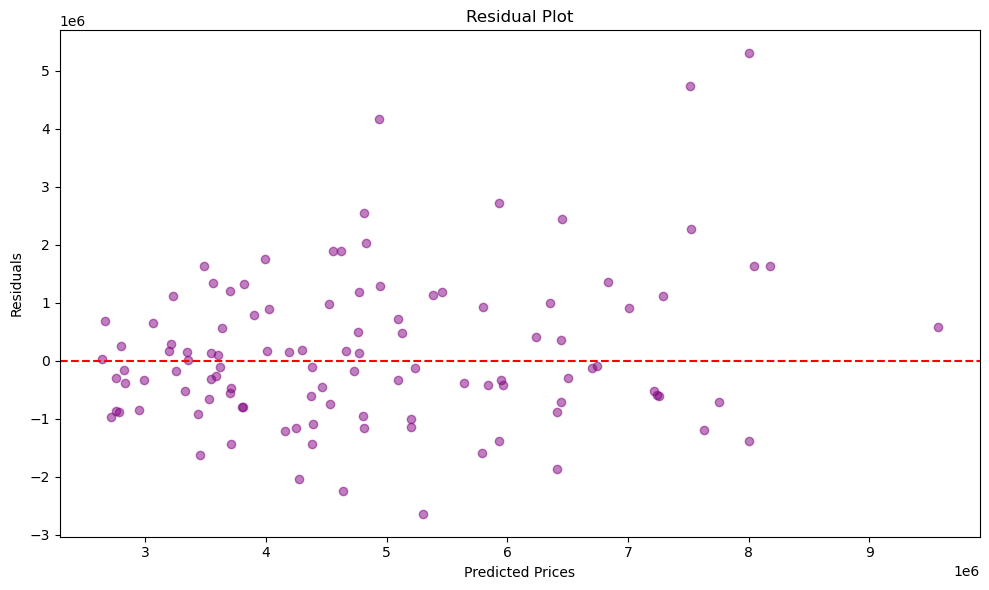

In [34]:
# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5, color='purple')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.tight_layout()
plt.show()

### Residual Plot - Explanation

The residual plot helps us assess our model's assumptions and identify potential problems:

1. **What are Residuals?**
   - Residuals = Actual Price - Predicted Price
   - Points above 0 show underestimates
   - Points below 0 show overestimates

2. **What to Look For:**
   - **Random Scatter**: Ideal pattern shows points randomly scattered
   - **No Pattern**: Any visible pattern suggests systematic errors
   - **Even Spread**: Similar spread across all predicted values is ideal

3. **Our Plot Shows:**
   - If there's even spread around the red line (unbiased predictions)
   - If residuals get larger with higher predictions (heteroscedasticity)
   - Any systematic errors in our model's predictions

## 7. Making Predictions
Let's create a function to make predictions for new house data and test it with a sample house.

In [35]:
def predict_house_price(input_data):
    """Predict house price based on input features"""
    # Convert input data to DataFrame
    input_df = pd.DataFrame([input_data])
    
    # Make prediction
    prediction = model.predict(input_df)
    
    return prediction[0]

# Example usage
sample_house = {
    'area': 7000,
    'bedrooms': 4,
    'bathrooms': 2,
    'stories': 2,
    'mainroad': 1,  # yes
    'guestroom': 1,  # yes
    'basement': 1,  # yes
    'hotwaterheating': 0,  # no
    'airconditioning': 1,  # yes
    'parking': 2,
    'prefarea': 1,  # yes
    'furnishing': 2  # furnished
}

predicted_price = predict_house_price(sample_house)
print(f'Predicted price for the sample house: {predicted_price:,.2f}')

Predicted price for the sample house: 8,125,099.31


In [36]:
def predict_house_price(input_data):
    """Predict house price based on input features
    
    Parameters:
    -----------
    input_data : dict
        Dictionary containing house features:
        - area: int/float (square feet)
        - bedrooms: int
        - bathrooms: int
        - stories: int
        - mainroad: int (1 for yes, 0 for no)
        - guestroom: int (1 for yes, 0 for no)
        - basement: int (1 for yes, 0 for no)
        - hotwaterheating: int (1 for yes, 0 for no)
        - airconditioning: int (1 for yes, 0 for no)
        - parking: int (number of spots)
        - prefarea: int (1 for yes, 0 for no)
        - furnishing: int (2 for furnished, 1 for semi-furnished, 0 for unfurnished)
    
    Returns:
    --------
    float
        Predicted price of the house
    """
    try:
        # Verify all required features are present
        required_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
                           'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
                           'parking', 'prefarea', 'furnishing']
        
        if not all(feature in input_data for feature in required_features):
            missing = [f for f in required_features if f not in input_data]
            raise ValueError(f'Missing required features: {missing}')
        
        # Convert input data to DataFrame
        input_df = pd.DataFrame([input_data])
        
        # Make prediction
        prediction = model.predict(input_df)
        
        return prediction[0]
    
    except Exception as e:
        print(f'Error making prediction: {str(e)}')
        return None

# Example usage with multiple test cases
test_houses = [
    {
        'area': 7000, 'bedrooms': 4, 'bathrooms': 2, 'stories': 2,
        'mainroad': 1, 'guestroom': 1, 'basement': 1, 'hotwaterheating': 0,
        'airconditioning': 1, 'parking': 2, 'prefarea': 1, 'furnishing': 2
    },
    {
        'area': 5000, 'bedrooms': 3, 'bathrooms': 1, 'stories': 1,
        'mainroad': 1, 'guestroom': 0, 'basement': 0, 'hotwaterheating': 0,
        'airconditioning': 1, 'parking': 1, 'prefarea': 0, 'furnishing': 1
    }
]

print('Predictions for sample houses:')
for i, house in enumerate(test_houses, 1):
    predicted_price = predict_house_price(house)
    print(f'\nHouse {i}:')
    print(f'Features: {house}')
    print(f'Predicted price: {predicted_price:,.2f}')

Predictions for sample houses:

House 1:
Features: {'area': 7000, 'bedrooms': 4, 'bathrooms': 2, 'stories': 2, 'mainroad': 1, 'guestroom': 1, 'basement': 1, 'hotwaterheating': 0, 'airconditioning': 1, 'parking': 2, 'prefarea': 1, 'furnishing': 2}
Predicted price: 8,125,099.31

House 2:
Features: {'area': 5000, 'bedrooms': 3, 'bathrooms': 1, 'stories': 1, 'mainroad': 1, 'guestroom': 0, 'basement': 0, 'hotwaterheating': 0, 'airconditioning': 1, 'parking': 1, 'prefarea': 0, 'furnishing': 1}
Predicted price: 4,379,125.00


## Conclusion
We have successfully completed the house price prediction project as per the requirements:

1. **Data Collection**: Loaded the housing dataset.
2. **Data Exploration and Cleaning**: Explored the dataset's structure, checked for missing values (none found), and visualized the data with histograms, scatter plots, box plots, and pair plots.
3. **Feature Selection**: Converted categorical variables to numeric and analyzed correlations to understand feature importance.
4. **Model Training**: Implemented linear regression using scikit-learn.
5. **Model Evaluation**: Evaluated the model using Mean Squared Error (MSE) and R-squared (R²), and analyzed feature importance.
6. **Visualization**: Created visualizations including actual vs. predicted values and a residual plot.
7. **Predictions**: Built a function to predict house prices and tested it with a sample house.

The model's R² score indicates how well it explains the variance in house prices, and the visualizations provide insights into the model's performance and data relationships.